In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import platform

In [35]:
if platform.system() == 'Linux':
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Get the MNIST datasetet

In [36]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data', train=False, download=True, transform=transform)

In [37]:
# Defining the batch size
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=True)

#### How does the model with conv layers work
1 color channel 6 Filters 3by3 kernel stride 1
conv1    --> ouput --> pooling --> conv2
6 filters                           16 filters

In [38]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [39]:
for i, (X_train, y_train) in enumerate(train_data):
    break

### Transform to the corredct 4D format
1 image
1 color channel
28 height
28 width

In [40]:
x = X_train.view(1, 1, 28, 28) # --> 4d batch
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
x = F.relu(conv1(x))
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [42]:
x.shape

torch.Size([1, 6, 26, 26])

In [43]:
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 6, 13, 13])

In [44]:
x = F.relu(conv2(x))

In [45]:
x.shape

torch.Size([1, 16, 11, 11])

In [46]:
x = F.max_pool2d(x, 2, 2)

In [47]:
x.shape

torch.Size([1, 16, 5, 5])

In [48]:
x.view(-1, 16*5*5).shape

torch.Size([1, 400])

### Define the model of the convolutional network

In [49]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [50]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [64]:
import time
start_time = time.time()

# Trackers
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # train
    for b, (X_train, y_train) in enumerate(train_loader):
        b+= 1
        y_pred = model(X_train) # no flat
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum() # true / false pick the trues and sum them
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"Epoch: {i} Batch: {b} Loss: {loss.item()}")

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # test
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            b += 1

            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)




current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

Epoch: 0 Batch: 600 Loss: 0.026812005788087845
Epoch: 0 Batch: 1200 Loss: 0.13242048025131226
Epoch: 0 Batch: 1800 Loss: 0.03613300994038582
Epoch: 0 Batch: 2400 Loss: 0.036492615938186646
Epoch: 0 Batch: 3000 Loss: 0.0061972374096512794
Epoch: 0 Batch: 3600 Loss: 0.004690560512244701
Epoch: 0 Batch: 4200 Loss: 0.08102057874202728
Epoch: 0 Batch: 4800 Loss: 0.2906548082828522
Epoch: 0 Batch: 5400 Loss: 0.13630953431129456
Epoch: 0 Batch: 6000 Loss: 0.28527072072029114
Epoch: 1 Batch: 600 Loss: 0.16554446518421173
Epoch: 1 Batch: 1200 Loss: 0.03612891584634781
Epoch: 1 Batch: 1800 Loss: 5.931326450081542e-05
Epoch: 1 Batch: 2400 Loss: 0.045228324830532074
Epoch: 1 Batch: 3000 Loss: 0.5116357207298279
Epoch: 1 Batch: 3600 Loss: 9.543428313918412e-05
Epoch: 1 Batch: 4200 Loss: 0.06145535036921501
Epoch: 1 Batch: 4800 Loss: 0.00022008700761944056
Epoch: 1 Batch: 5400 Loss: 0.00030545835033990443
Epoch: 1 Batch: 6000 Loss: 0.010972493328154087
Epoch: 2 Batch: 600 Loss: 0.0459136962890625
Ep

In [60]:
# save of colab
if platform.system() == 'Linux':
  torch.save(model.state_dict(), '/content/drive/MyDrive/deep learning/pytorch_course/my files/rnc/CNN_MNIST.pt')
else:
  torch.save(model.state_dict(), 'CNN_MNIST.pt')

In [67]:
model = ConvolutionalNetwork()

# load the model
if platform.system() == 'Linux':
  model.load_state_dict(torch.load('/content/drive/MyDrive/deep learning/pytorch_course/my files/rnc/CNN_MNIST.pt'))
else:
  model.load_state_dict(torch.load('CNN_MNIST.pt'))


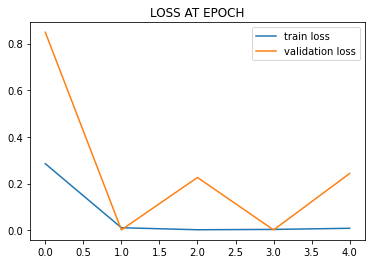

In [65]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()

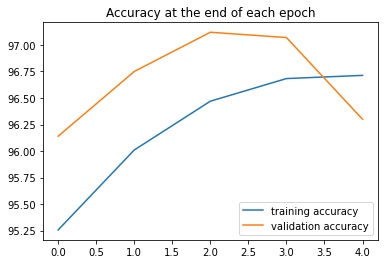

In [66]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [ ]:
test_load_all = DataLoader(test_data, batch_size)